## Monthly value: Temperature of each month in a year & Sales of 10 stores in a year


# EX1:
The file contain temperature data in 2009. Each column contain data for a month. The first column is the day of the month. -99 and 30 mean missing data.

Plot the daily temperature and monthly temperature in the same plot. Show the mean value of each month.

<ipython-input-19-4d98921668fb>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


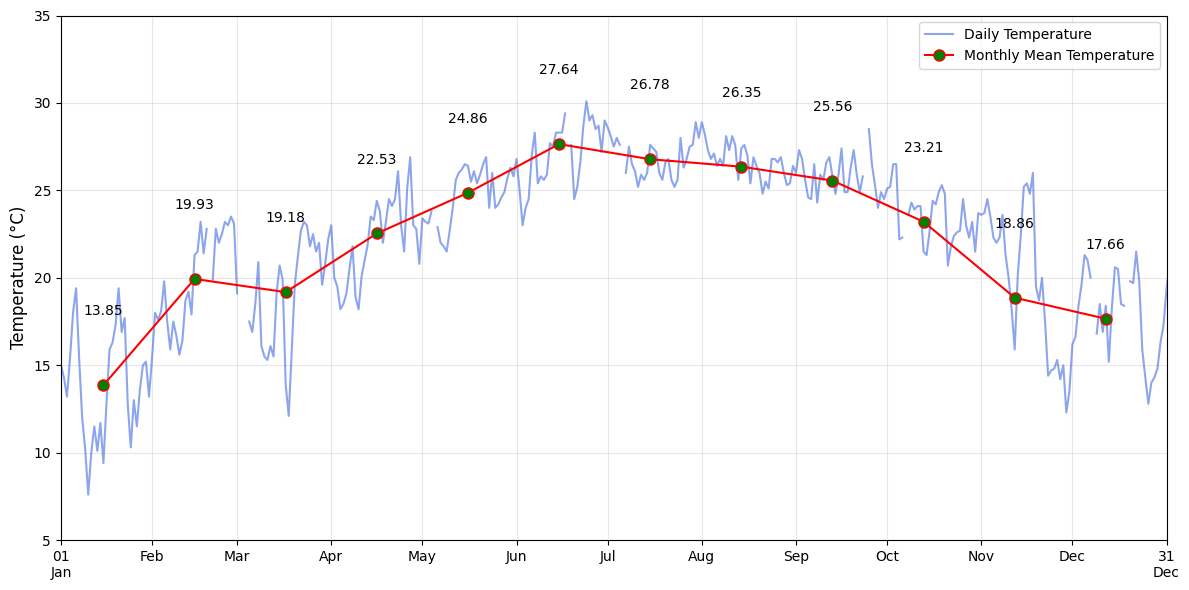

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from numpy import *
from datetime import *

file_path = 'Data_EX1.txt'  
data = pd.read_csv(file_path, delim_whitespace=True, header=None)

data.columns = ['Day'] + [f'Month_{i+1}' for i in range(12)]

data.replace([-99, 30], np.nan, inplace=True)

daily_temperature = np.concatenate([data[f'Month_{i}'] for i in range(1, 13)])
days_of_year = np.arange(1, len(daily_temperature) + 1)  # Total days in the year

monthly_means = data.iloc[:, 1:13].mean(skipna=True)

month_boundaries = np.array([i * 30 for i in range(13)])  # 0, 30, 60, ..., 360
mean_positions = (month_boundaries[:-1] + month_boundaries[1:]) / 2

plt.figure(figsize=(12, 6))

plt.plot(days_of_year, daily_temperature, color='royalblue', alpha=0.6, label='Daily Temperature')

plt.plot(mean_positions, monthly_means, '-o', color='red', markersize=8,
         label='Monthly Mean Temperature', markerfacecolor='green')

for i, mean in enumerate(monthly_means):
    plt.text(mean_positions[i], mean + 4, f'{mean:.2f}', ha='center', fontsize=10)

xticks_positions = [1] + list(np.cumsum([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])[:-1]) + [365]
xticks_labels = ['01\nJan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '31\nDec']

plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(ticks=xticks_positions, labels=xticks_labels)
plt.xlim(1, 365)  
plt.ylim(5, 35)  
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

---

---

## EX2:

Imagine that you are a business man, and you sell 3 kinds of fruit: apple, banana, and durian

You have 10 stores. Now, you want to know which store sell the most, which month sell the most, and which fruit sell the most.

1. Use Pie chart, Draw the pie plot for 12 months, 10 stations. The radius of the pie chart is proportional to the total sale.

For example, if  
* < 40: radi = 0.1
* < 60:   radi = 0.3
* < 80:   radi = 0.5
* < 100:  radi = 0.7
* More than 100: radi = 1.


2. Which station sell the most?

In [ ]:
from numpy import *

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib.colors import BoundaryNorm


random.seed(seed=180793)
apple = random.randint(0, 30, size = (10,12))       
banana = random.randint(0, 60, size = (10,12))      
durian = random.randint(0, 80, size = (10,12))      

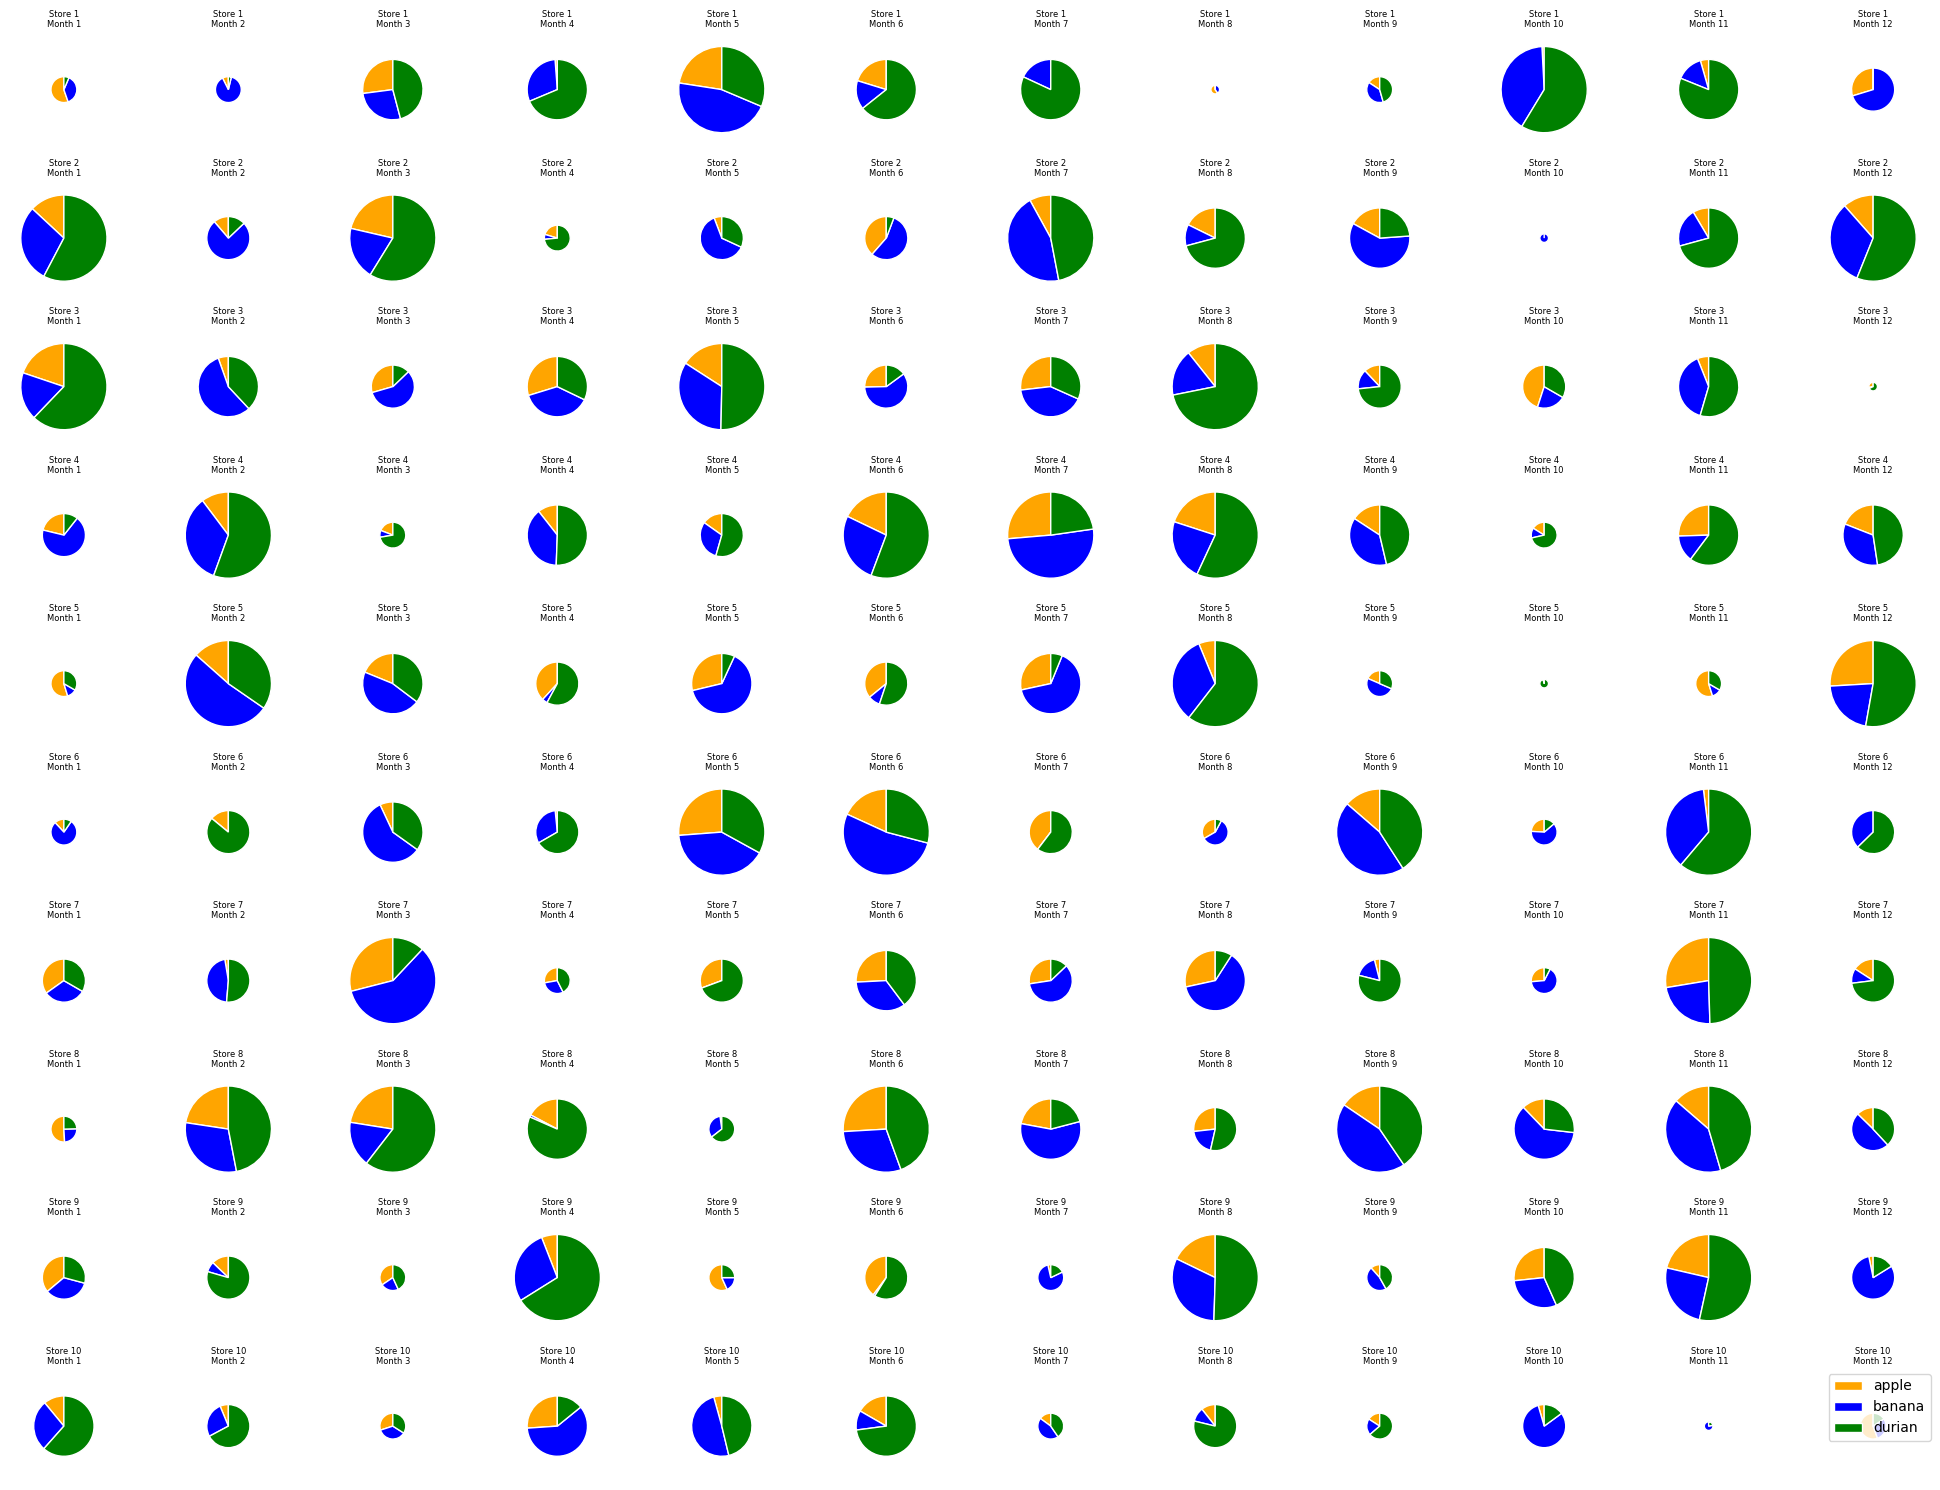

In [ ]:
total_sales = apple + banana + durian

def calculate_radius(sales):
    if sales < 40:
        return 0.1
    elif sales < 60:
        return 0.3
    elif sales < 80:
        return 0.5
    elif sales < 100:
        return 0.7
    else:
        return 1.0

radii = np.vectorize(calculate_radius)(total_sales)

fig, ax = plt.subplots(10, 12, figsize=(20, 15), subplot_kw=dict(aspect="equal"))

for i in range(10):  
    for j in range(12):  
        sizes = [apple[i, j], banana[i, j], durian[i, j]]
        radius = radii[i, j]
        ax[i, j].pie(
            sizes,
            radius=radius,
            colors=["orange", "blue", "green"],
            startangle=90,
            wedgeprops=dict(width=radius, edgecolor="w")
        )
        ax[i, j].set_title(f"Store {i+1}\nMonth {j+1}", fontsize=6)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.tight_layout()
plt.legend(["apple", "banana", "durian"], loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
store_totals = total_sales.sum(axis=1)  
month_totals = total_sales.sum(axis=0) 
fruit_totals = [apple.sum(), banana.sum(), durian.sum()]  
best_store = np.argmax(store_totals) + 1
best_month = np.argmax(month_totals) + 1
best_fruit = ["apple", "banana", "durian"][np.argmax(fruit_totals)]

print(f"Best selling store: Store {best_store}")
print(f"Best selling month: Month {best_month}")
print(f"Best selling fruit: {best_fruit}")

Best selling store: Store 4
Best selling month: Month 11
Best selling fruit: durian
